<a href="https://colab.research.google.com/github/LeeDongGeon1996/TensorFlow-study-note/blob/master/my-practice/Experiment_04_ReLU_with_zero_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment_04_ReLU with zero weight

 * Conclusion
 > cannot process learning with zero-weght.

 ```
Epoch : 0, Loss : 1.022075
Epoch : 1000, Loss : 0.693167
Epoch : 2000, Loss : 0.693147
Epoch : 3000, Loss : 0.693147
Epoch : 4000, Loss : 0.693147
Epoch : 5000, Loss : 0.693147
Epoch : 6000, Loss : 0.693147
Epoch : 7000, Loss : 0.693147
Epoch : 8000, Loss : 0.693147
 ``` 

2.1.0


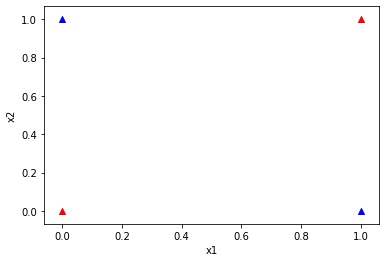

In [37]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import time

print(tf.__version__)
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [0]:
tf.random.set_seed(777)  # for reproducibility

#w_layer1 = tf.Variable(tf.zeros([2,2], dtype=tf.float32))
#b_layer1 = tf.Variable(tf.zeros([1,2], dtype=tf.float32))


w_layer1 = tf.Variable(tf.random.normal([2,2], dtype=tf.float32))
b_layer1 = tf.Variable(tf.random.normal([1,2], dtype=tf.float32))
w_layer2 = tf.Variable(tf.random.normal([2,2], dtype=tf.float32))
b_layer2 = tf.Variable(tf.random.normal([1,2], dtype=tf.float32))

w_output = tf.Variable(tf.random.normal([2,1], dtype=tf.float32))
b_output = tf.Variable(tf.random.normal([1,], dtype=tf.float32))



def hypothesis(features):
  layer1 = tf.nn.sigmoid(tf.matmul(features, w_layer1) + b_layer1)
  layer2 = tf.nn.relu(tf.matmul(layer1, w_layer2) + b_layer2)
  output_layer = tf.nn.sigmoid(tf.matmul(layer2, w_output) + b_output)

  return output_layer

def get_cost(features, labels):
  output = hypothesis(features)
  cost = labels * tf.math.log(output) + (1-labels) * tf.math.log(1-output)
  mean_cost = -tf.reduce_mean(cost)

  return mean_cost

def get_accuracy(features, labels):
  output = hypothesis(features)
  output = tf.cast(output > 0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(output,labels), dtype=tf.float32))
  
  return accuracy

def fit(dataset, epoch=50000, verbose=1000):
  for i in range(epoch):
    for features, labels in dataset:    
      with tf.GradientTape() as g:
        cost = get_cost(features, labels)
        grads = g.gradient(cost, [w_layer1, w_output, b_layer1, b_output])
        optimizer.apply_gradients(grads_and_vars = zip(grads, [w_layer1, w_output, b_layer1, b_output]))

      if((i % verbose) == 0):
        print("Epoch : {}, Loss : {:.6f}".format(i, cost))


In [39]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
x, y = preprocess_data(x_data, y_data)
dataset = tf.data.Dataset.from_tensor_slices((x, y)).batch(len(x_data))
fit(dataset)

test_acc = get_accuracy(x, y)
print('test accr : {}'.format(test_acc))


Epoch : 0, Loss : 0.950134
Epoch : 1000, Loss : 0.519776
Epoch : 2000, Loss : 0.506147
Epoch : 3000, Loss : 0.498170
Epoch : 4000, Loss : 0.492926
Epoch : 5000, Loss : 0.489825
Epoch : 6000, Loss : 0.487855
Epoch : 7000, Loss : 0.486414
Epoch : 8000, Loss : 0.485317
Epoch : 9000, Loss : 0.484455
Epoch : 10000, Loss : 0.483760
Epoch : 11000, Loss : 0.483188
Epoch : 12000, Loss : 0.482709
Epoch : 13000, Loss : 0.482302
Epoch : 14000, Loss : 0.481953
Epoch : 15000, Loss : 0.481649
Epoch : 16000, Loss : 0.481384
Epoch : 17000, Loss : 0.481149
Epoch : 18000, Loss : 0.480940
Epoch : 19000, Loss : 0.480753
Epoch : 20000, Loss : 0.480584
Epoch : 21000, Loss : 0.480432
Epoch : 22000, Loss : 0.480293
Epoch : 23000, Loss : 0.480166
Epoch : 24000, Loss : 0.480050
Epoch : 25000, Loss : 0.479943
Epoch : 26000, Loss : 0.479844
Epoch : 27000, Loss : 0.479753
Epoch : 28000, Loss : 0.479668
Epoch : 29000, Loss : 0.479589
Epoch : 30000, Loss : 0.479515
Epoch : 31000, Loss : 0.479446
Epoch : 32000, Loss :